# Diamond Cut Classification with Machine Learning


In [44]:
# Diamond Cut Classification with Machine Learning

In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [46]:
#read data
df=pd.read_csv("diamonds.csv")

In [47]:
!pip install ydata-profiling

In [48]:
#EDA
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
# save report
profile.to_file("output_report.html")
# display report
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 10.91it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
#drop duplicaet
df = df.drop_duplicates()

In [50]:
# deep learning modeling

In [51]:
# x , y split
X = df.drop('cut', axis=1)
y = df['cut']

In [52]:
from sklearn.preprocessing import LabelEncoder

# X için dummies kullanmaya devam edebilirsin
X = df.drop('cut', axis=1)
X = pd.get_dummies(X, drop_first=True)

# y için MUTLAKA LabelEncoder kullanmalısın
le = LabelEncoder()
y = le.fit_transform(df['cut']) # 'cut' sütununu 0,1,2,3,4 değerlerine çevirir

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
model = Sequential()
model.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

# 5 farklı diamond cut (Fair, Good, vs.) olduğu için 5 nöron
model.add(Dense(5, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy", # y tam sayı olduğu için bu doğru seçim
    metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [57]:
# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5972 - loss: 1.0232 - val_accuracy: 0.6978 - val_loss: 0.8050
Epoch 2/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7007 - loss: 0.7642 - val_accuracy: 0.6970 - val_loss: 0.7888
Epoch 3/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7118 - loss: 0.7419 - val_accuracy: 0.6934 - val_loss: 0.7848
Epoch 4/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7182 - loss: 0.7257 - val_accuracy: 0.7114 - val_loss: 0.7592
Epoch 5/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7176 - loss: 0.7203 - val_accuracy: 0.7120 - val_loss: 0.7546
Epoch 6/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7178 - loss: 0.7153 - val_accuracy: 0.7126 - val_loss: 0.7600
Epoch 7/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7279 - loss: 0.6989 - val_accuracy: 0.7120 - val_loss: 0.7463
Epoch 8/50
1076/1076 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7350 - loss: 0.6818 -

In [58]:
# make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

337/337 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.7844595222604331
              precision    recall  f1-score   support

     b'Fair'       0.84      0.89      0.87       319
     b'Good'       0.80      0.63      0.70       978
    b'Ideal'       0.81      0.91      0.86      4298
  b'Premium'       0.83      0.78      0.80      2750
b'Very Good'       0.66      0.61      0.63      2414

    accuracy                           0.78     10759
   macro avg       0.79      0.76      0.77     10759
weighted avg       0.78      0.78      0.78     10759



In [59]:
#auto ml modeling

In [60]:
!pip install -U autogluon

In [61]:
train_df = X.copy()
train_df["cut"] = le.inverse_transform(y)

In [64]:
train_data = df.copy()

from autogluon.tabular import TabularPredictor

predictor = TabularPredictor(
    label="cut", # Bu ismin train_data içindeki sütun ismiyle birebir aynı olduğundan emin ol
    problem_type="multiclass",
    eval_metric="accuracy"
).fit(
    train_data, # X ve y'yi birleştirdiğin ham DataFrame
    presets="best_quality",
    time_limit=300
)

No path specified. Models will be saved in: "AutogluonModels/ag-20260120_210530"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Pytorch Version:    2.9.0+cpu
CUDA Version:       CUDA is not available
Memory Avail:       9.32 GB / 12.67 GB (73.6%)
Disk Space Avail:   85.20 GB / 107.72 GB (79.1%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacki

In [66]:
predictor.leaderboard(silent=True) #compare models

model  score_val eval_metric  pred_time_val    fit_time  \
0     WeightedEnsemble_L3   0.774938    accuracy       5.027457  224.536167   
1  NeuralNetFastAI_BAG_L2   0.773748    accuracy       5.012753  223.925792   
2  NeuralNetFastAI_BAG_L1   0.772651    accuracy       1.825627  139.415031   
3     WeightedEnsemble_L2   0.772651    accuracy       1.837962  139.434282   

   pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                0.014705           0.610374            3       True   
1                3.187126          84.510761            2       True   
2                1.825627         139.415031            1       True   
3                0.012335           0.019250            2       True   

   fit_order  
0          4  
1          3  
2          1  
3          2

In [74]:
# Eğer veriyi başta ayırdıysan (X_test, y_test gibi),
# AutoGluon için test verisini de ham halde hazırla:
test_data = pd.read_csv("diamonds.csv") # veya ayırdığın test seti

# Test verisi üzerinde performans ölçümü
performance_test = predictor.evaluate(test_data)
print("Test Seti Doğruluğu:", performance_test)

Test Seti Doğruluğu: {'accuracy': 0.7879124953652206, 'balanced_accuracy': np.float64(0.7575721410904623), 'mcc': np.float64(0.7011900699360603)}


In [75]:
# AutoGluon için özellik önemini görselleştir
importance = predictor.feature_importance(train_data)
print(importance)

Computing feature importance via permutation shuffling for 9 features using 5000 rows with 5 shuffle sets...
	300.88s	= Expected runtime (60.18s per shuffle set)
	95.6s	= Actual runtime (Completed 5 of 5 shuffle sets)


         importance    stddev       p_value  n  p99_high   p99_low
'x'         0.52364  0.007916  6.266273e-09  5  0.539940  0.507340
'y'         0.49848  0.008415  9.741796e-09  5  0.515807  0.481153
table       0.28440  0.008358  8.941699e-08  5  0.301610  0.267190
depth       0.21308  0.006874  1.297922e-07  5  0.227234  0.198926
carat       0.07244  0.007040  1.057354e-05  5  0.086936  0.057944
price       0.01276  0.004194  1.219305e-03  5  0.021395  0.004125
'z'         0.01068  0.003921  1.836904e-03  5  0.018753  0.002607
clarity     0.00204  0.001506  1.941006e-02  5  0.005141 -0.001061
color       0.00132  0.001677  7.659442e-02  5  0.004773 -0.002133


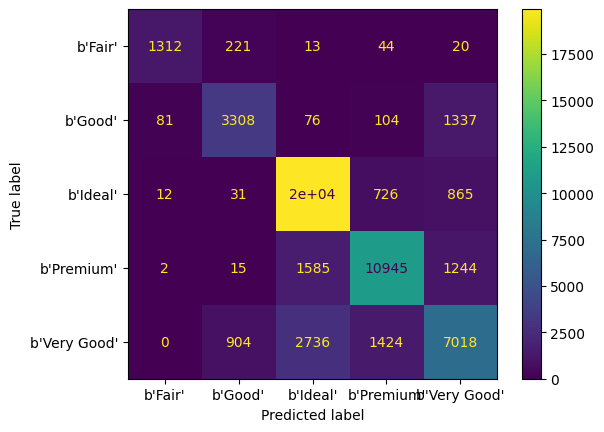

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Tahminleri al
y_pred = predictor.predict(test_data)
y_true = test_data['cut']

# Matrisi oluştur ve çiz
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=predictor.class_labels)
disp.plot()
plt.show()